# Data Preparation

### Workflow
* Import data
* Merge
* Duplicate cleaning
* Data type conversion
* Categorizing the pricing feature
* Export to csv

### Next Step
* Handling of missing values
* Normalization
* Exploratory analysis (plots)



#### Import Data

In [0]:
import pandas as pd

data_1 = 'https://raw.githubusercontent.com/richardmahuze/sysen5880project/master/sysen5880.csv'
data_2 = 'https://raw.githubusercontent.com/richardmahuze/sysen5880project/master/EVs_Stations_NY.csv'

df1 = pd.read_csv(data_1)
df2 = pd.read_csv(data_2)



#### Merge and clean duplicates

In [0]:
df1['Zipcode'] = pd.to_numeric(df1['Zipcode'], errors='coerce')

df3 = pd.merge(df1,df2, on='Zipcode', how='inner')

df3['geocode'] = list(zip(df3.Latitude, df3.Longitude))

nrel = pd.read_csv('https://raw.githubusercontent.com/richardmahuze/sysen5880project/master/nrel_data.csv',
                   usecols=range(0, 61),encoding ='ISO-8859-1')

nrel.rename(columns = {'zip':'Zipcode'}, inplace = True) 
nrel.rename(columns = {'latitude':'Latitude'}, inplace = True) 
nrel.rename(columns = {'longitude':'Longitude'}, inplace = True) 
nrel['geocode'] = list(zip(nrel.Latitude, nrel.Longitude))

In [0]:
df3[['Zipcode','geocode','Station Name', 'Street Address']].head(10)


,Zipcode,geocode,Station Name,Street Address
0,12009.0,"(42.716215999999996, -73.934492)",Hannaford Supermarket,5239 Western Tpke
1,12045.0,"(42.472557, -73.790396)",LANDING PARK,70 Main St
2,12047.0,"(42.78051, -73.704094)",HARMONY MILLS 1,N Mohawk St & Vliet St
3,12047.0,"(42.771298, -73.752656)",NATIONAL GRID,977 Loudon rd
4,12047.0,"(42.775368, -73.70135)",COHOES,65 Remsen St
5,12047.0,"(42.772415, -73.701065)",COHOES,18 White St
6,12047.0,"(42.778925, -73.702993)",HARMONY MILLS 1,50 N Mohawk St
7,12047.0,"(42.791645, -73.71457)",COHOES,97 N Mohawk St
8,12047.0,"(42.780881, -73.705676)",HARMONY MILLS 1,100 N Mohawk St
9,12047.0,"(42.78158, -73.705696)",HARMONY MILLS 1,Mohawk St & Cohoes Mills


In [0]:
# Number of duplicate geocode values in df3
len(df3['geocode'])-len(df3['geocode'].drop_duplicates())

21

In [0]:
dupes_geocode = df3[df3.duplicated(['geocode'], keep=False)]

In [0]:
# displaying the duplicates
dupes_geocode[['Station Name','geocode']].head(10)

,Station Name,geocode
130,ScottTech,"(42.103472, -75.89229300000001)"
131,Scotttech - Tesla Destination,"(42.103472, -75.89229300000001)"
272,Buffalo Niagara Medical Campus - Ellicott Stre...,"(42.89582, -78.86798)"
273,Buffalo Niagara Medical Campus - Ellicott Stre...,"(42.89582, -78.86798)"
412,Kings County Parking - Tesla Destination,"(40.656147999999995, -73.94035500000001)"
413,Greenlots - 92133,"(40.656147999999995, -73.94035500000001)"
432,"Walgreens - Brooklyn, NY #15097 |P391","(40.65678, -73.97776)"
435,Walgreens,"(40.65678, -73.97776)"
473,Lima - Town Court,"(42.90552, -77.610606)"
474,Village of Lima,"(42.90552, -77.610606)"


In [0]:
df3.shape


(1654, 62)

In [0]:
df3 = df3.drop_duplicates(subset='geocode')
df3 = df3[df3['Zipcode'].notna()]

# after dropping duplicates
df3.shape


(1633, 62)

In [0]:
# dropping all features on nrel except geocode and ev_pricing
nrel = nrel.filter(['geocode', 'ev_pricing'])

# merging ev_pricing into the df3
df4 = pd.merge(df3,nrel, on='geocode', how='left')
df4.shape

(1689, 63)

In [0]:
# Number of duplicate geocode values in df4
len(df4['geocode'])-len(df4['geocode'].drop_duplicates())

56

In [0]:
dupes_geocode2 = df4[df4.duplicated(['geocode'], keep=False)]

In [0]:
# displaying the duplicates

dupes_geocode2[['Station Name','Street Address','geocode','ev_pricing','EV Connector Types']].shape

(112, 5)

In [0]:
df4 = df4[~df4['geocode'].duplicated(keep=False) | df4[['ev_pricing']].notnull().any(axis=1)]
df4[['Station Name','Street Address','geocode','ev_pricing','EV Connector Types']].loc[74:76]


,Station Name,Street Address,geocode,ev_pricing,EV Connector Types
74,DeNooyer Chevrolet,127 Wolf Rd,"(42.717867, -73.806317)",Free,J1772COMBO
76,ROSENBLUM300,1 Winners Cir,"(42.718322, -73.797207)",NaN,J1772


In [0]:
df4 = df4.drop_duplicates(subset='geocode')


In [0]:
df4['ev_pricing'].isnull().sum(), df4.shape

(698, (1630, 63))

In [0]:
# reading data about counties in NY 

df5 = pd.read_csv('https://raw.githubusercontent.com/richardmahuze/sysen5880project/master/ny_fips.csv')
df5.head()

,County Name,State FIPS,County Code,County FIPS,ZIP Code,File Date
0,Albany,36,1,36001,12007,07/25/2007
1,Albany,36,1,36001,12009,07/25/2007
2,Albany,36,1,36001,12023,07/25/2007
3,Albany,36,1,36001,12041,07/25/2007
4,Albany,36,1,36001,12045,07/25/2007


In [0]:
# Renaming the 'ZIP Code' feature to 'Zipcode'

df5.rename(columns = {'ZIP Code':'Zipcode'}, inplace = True) 

# dropping all columns except Zipcode and County FIPS
df5 = df5.filter(['Zipcode', 'County FIPS'])

In [0]:
df6 = pd.merge(df4,df5, on='Zipcode', how='inner')
df6.shape

(1838, 64)

In [0]:
dupes_geocode3 = df6[df6.duplicated(['geocode'], keep=False)]
dupes_geocode3[['Station Name','Street Address','geocode','ev_pricing','EV Connector Types']].shape, len(df6['geocode'])-len(df6['geocode'].drop_duplicates())

((400, 5), 210)

In [0]:
dupes_geocode3[['Station Name','Street Address','geocode','ev_pricing','EV Connector Types']].head(8)

,Station Name,Street Address,geocode,ev_pricing,EV Connector Types
0,Hannaford Supermarket,5239 Western Tpke,"(42.716215999999996, -73.934492)",NaN,CHADEMO J1772COMBO
1,Hannaford Supermarket,5239 Western Tpke,"(42.716215999999996, -73.934492)",NaN,CHADEMO J1772COMBO
113,Century Parking Corp - Tesla Destination,2600 Netherland Ave,"(40.878611, -73.914792)",Free,TESLA
114,Century Parking Corp - Tesla Destination,2600 Netherland Ave,"(40.878611, -73.914792)",Free,TESLA
115,3050 Corlear Ave - Nagle Parking Inc. - Tesla ...,3050 Corlear Ave,"(40.8799, -73.907762)",Free,TESLA
116,3050 Corlear Ave - Nagle Parking Inc. - Tesla ...,3050 Corlear Ave,"(40.8799, -73.907762)",Free,TESLA
126,GAULT BMW,2311 North St,"(42.107059, -76.035088)",$0.17 per kWh,J1772
127,GAULT BMW,2311 North St,"(42.107059, -76.035088)",$0.17 per kWh,J1772
151,Fair Haven Public Works,14523 Cayuga St,"(43.319653, -76.69855799999999)",NaN,J1772
152,Fair Haven Public Works,14523 Cayuga St,"(43.319653, -76.69855799999999)",NaN,J1772


In [0]:
df6 = df6.drop_duplicates(subset='geocode')
df6.shape

(1628, 64)

#### Visualizing missing data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


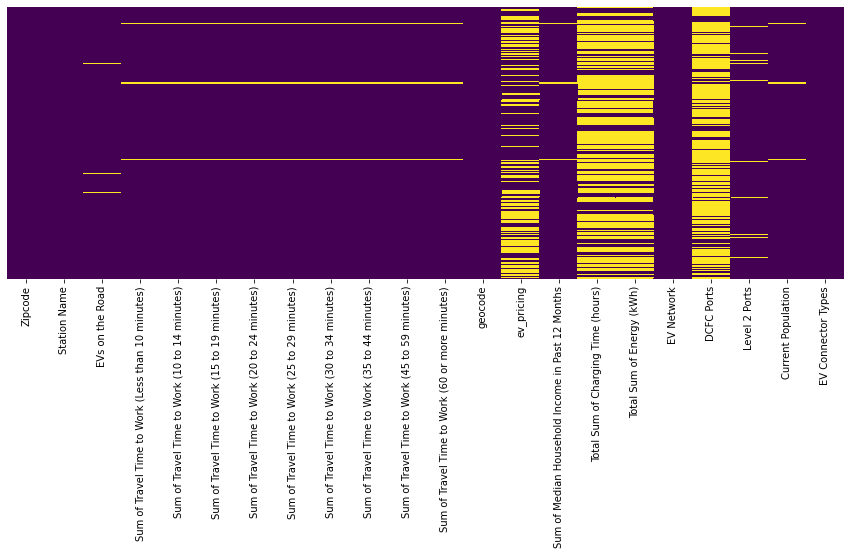

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plotting the heatmap for missing data visualization
plt.subplots(figsize=(15,5))
sns.heatmap(df6[['Zipcode','Station Name','EVs on the Road','Sum of Travel Time to Work (Less than 10 minutes)',
                 'Sum of Travel Time to Work (10 to 14 minutes)',
                 'Sum of Travel Time to Work (15 to 19 minutes)',
                 'Sum of Travel Time to Work (20 to 24 minutes)',
                 'Sum of Travel Time to Work (25 to 29 minutes)',
                 'Sum of Travel Time to Work (30 to 34 minutes)',
                 'Sum of Travel Time to Work (35 to 44 minutes)',
                 'Sum of Travel Time to Work (45 to 59 minutes)',
                 'Sum of Travel Time to Work (60 or more minutes)',                
                 'geocode','ev_pricing','Sum of Median Household Income in Past 12 Months',
                'Total Sum of Charging Time (hours)','Total Sum of Energy (kWh)',
                'EV Network','DCFC Ports','Level 2 Ports','Current Population',
                'EV Connector Types']].isnull(),yticklabels=False, cbar=False,cmap='viridis')

#### Data type conversion

In [0]:
# Sorting, if needed
# df3.sort_values(by=['Station Name'], inplace=True)
# df4.sort_values(by=['Station Name'], inplace=True)


In [0]:
df6.dtypes

Zipcode                float64
Current Population      object
EVs on the Road         object
BEVs per 1k People     float64
PHEVs per 1k People    float64
                        ...   
Open Date               object
EV Connector Types      object
geocode                 object
ev_pricing              object
County FIPS              int64
Length: 64, dtype: object

In [0]:
#changing the datatypes of several columns in df4

df6['Current Population'] = df6['Current Population'].str.replace(',', '').astype(float)
df6['EVs on the Road'] = df6['EVs on the Road'].str.replace(',', '').astype(float)
df6['Level 2 Ports'] = df6['Level 2 Ports'].str.replace(',', '').astype(float)
df6['DCFC per 1k People'] = df6['DCFC per 1k People'].str.replace(',', '').astype(float)
df6['Level 2 per 1k People'] = df6['Level 2 per 1k People'].str.replace(',', '').astype(float)
df6['Sum of Median Household Income in Past 12 Months'] = df6['Sum of Median Household Income in Past 12 Months'].str.replace('$', '').str.replace(',', '').str.replace('-', '').str.replace('(', '').str.replace(')', '').astype(float)

#changing the Zipcode column of df1 from str to int64. Any non-covertible var gets NaN
# df1['Zipcode'] = pd.to_numeric(df1['Zipcode'], errors='coerce')


#### Export CSV

In [0]:
from google.colab import  drive

drive.mount('/drive')


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [0]:
df6.to_csv('/drive/My Drive/Transportation Project Team/data processing/merged_data.csv')


#### Establishing categories for the pricing feature

In [0]:
# establishing categories for ev_pricing feature

searchfor_time = ['Time', 'hour', 'minute']
searchfor_minmax = ['minimum', 'maximum']


df6.loc[df6['ev_pricing'].str.contains('|'.join(searchfor_time),na=False), 'ev_pricing'] = 'Time Dependance'

df6.loc[df6['ev_pricing'].str.contains('|'.join(searchfor_minmax),na=False), 'ev_pricing'] = 'MinMax Payment'

df6.loc[df6['ev_pricing'].str.contains('session',na=False), 'ev_pricing'] = 'Per Session'


In [0]:
df6.loc[df6['ev_pricing'].str.contains('per',na=False), 'ev_pricing'] = 'Per KwH'

df6.loc[df6['ev_pricing'].str.contains('Free',na=False), 'ev_pricing'] = 'Free'

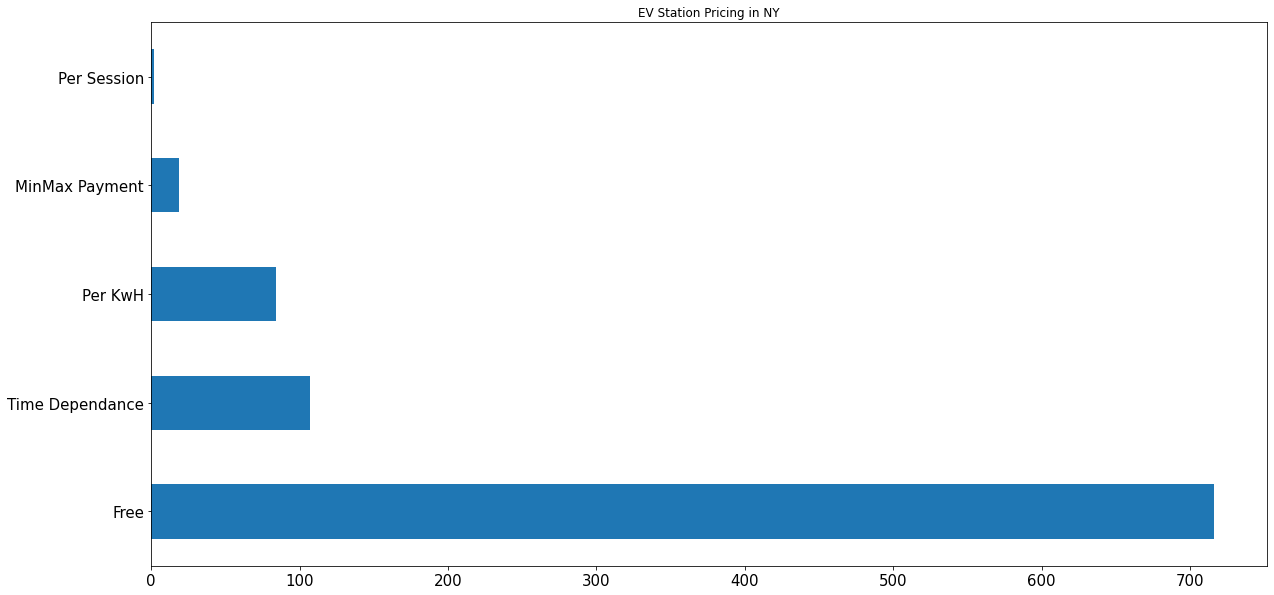

In [0]:
df6['ev_pricing'].value_counts().plot(kind='barh',figsize=(20,10),title='EV Station Pricing in NY', fontsize=15)

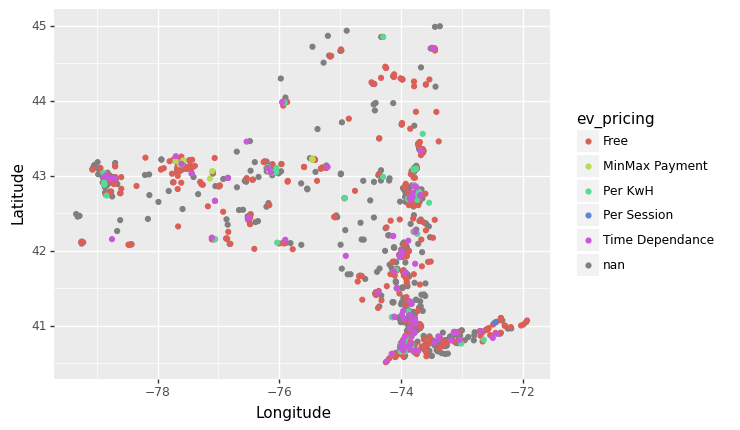

<ggplot: (8784976391607)>


In [0]:
from plotnine import *

p = ggplot(df6, aes(x='Longitude', y='Latitude', color='ev_pricing')) + geom_point(stat='summary')

# save the plot as a png file in the working directory
#ggsave(plot = p, filename='testplot', width = 4, height = 4, units = "in",dpi = 300)

print(p)

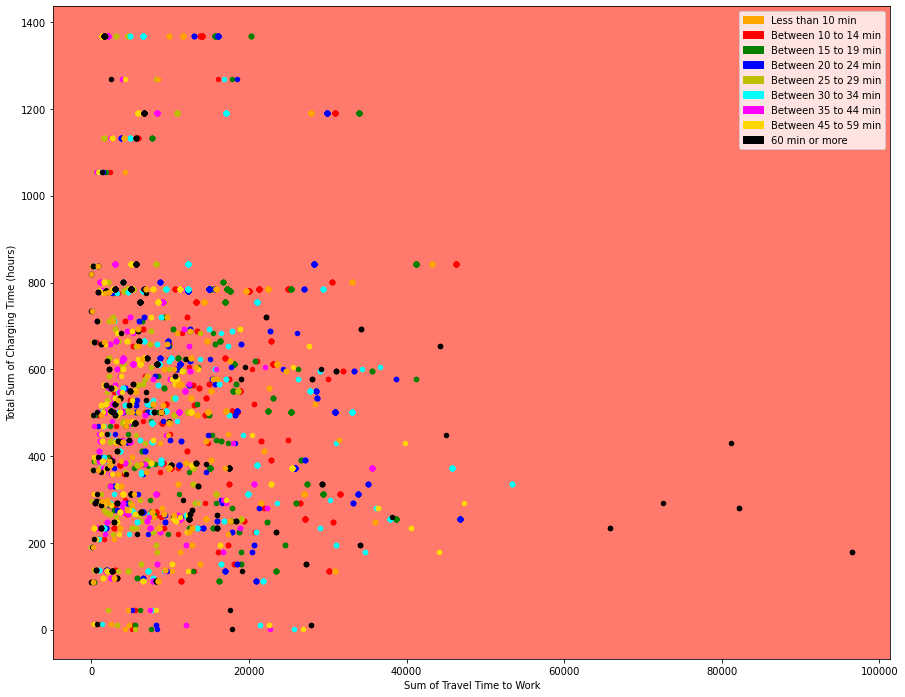

In [0]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

ax1 = df6.plot(kind='scatter', x='Sum of Travel Time to Work (10 to 14 minutes)', y='Total Sum of Charging Time (hours)', color='r', figsize=(15,12))    
ax2 = df6.plot(kind='scatter', x='Sum of Travel Time to Work (15 to 19 minutes)', y='Total Sum of Charging Time (hours)', color='g', ax=ax1)    
ax3 = df6.plot(kind='scatter', x='Sum of Travel Time to Work (20 to 24 minutes)', y='Total Sum of Charging Time (hours)', color='b', ax=ax1)
ax4 = df6.plot(kind='scatter', x='Sum of Travel Time to Work (25 to 29 minutes)', y='Total Sum of Charging Time (hours)', color='y', ax=ax1)
ax5 = df6.plot(kind='scatter', x='Sum of Travel Time to Work (30 to 34 minutes)', y='Total Sum of Charging Time (hours)', color='cyan', ax=ax1)
ax6 = df6.plot(kind='scatter', x='Sum of Travel Time to Work (35 to 44 minutes)', y='Total Sum of Charging Time (hours)', color='magenta', ax=ax1)
ax7 = df6.plot(kind='scatter', x='Sum of Travel Time to Work (45 to 59 minutes)', y='Total Sum of Charging Time (hours)', color='gold', ax=ax1)
ax8 = df6.plot(kind='scatter', x='Sum of Travel Time to Work (60 or more minutes)', y='Total Sum of Charging Time (hours)', color='black', ax=ax1)
ax9 = df6.plot(kind='scatter', x='Sum of Travel Time to Work (Less than 10 minutes)', y='Total Sum of Charging Time (hours)', color='orange', ax=ax1)



ax1.set_facecolor('xkcd:salmon')

ax1.set_xlabel("Sum of Travel Time to Work")

less10 = mpatches.Patch(color='orange', label='Less than 10 min')
bw1014 = mpatches.Patch(color='r', label='Between 10 to 14 min')
bw1519 = mpatches.Patch(color='g', label='Between 15 to 19 min')
bw2024 = mpatches.Patch(color='b', label='Between 20 to 24 min')
bw2529 = mpatches.Patch(color='y', label='Between 25 to 29 min')
bw3034 = mpatches.Patch(color='cyan', label='Between 30 to 34 min')
bw3544 = mpatches.Patch(color='magenta', label='Between 35 to 44 min')
bw4459 = mpatches.Patch(color='gold', label='Between 45 to 59 min')
more60 = mpatches.Patch(color='black', label='60 min or more')

plt.legend(handles=[less10,bw1014,bw1519,bw2024,bw2529,bw3034,bw3544,bw4459,more60])


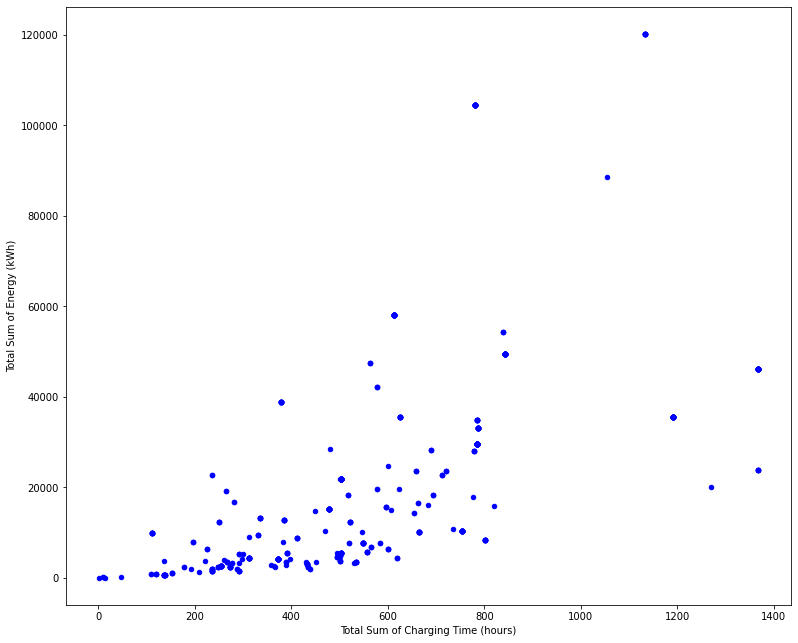

In [0]:
ax = df6.plot(kind='scatter', x='Total Sum of Charging Time (hours)', y='Total Sum of Energy (kWh)', color='b', figsize=(13,11))    
